# Import modules

In [1]:
from Model import *
from utilities import *
from sklearn.metrics import accuracy_score,confusion_matrix
from torchsummary import summary
from torch.optim import Adam
from torch.autograd import Variable
from typing import Any, Optional, Tuple
import numpy as np
import torch.utils.data as Data
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import copy
import time
import torch
import torch.nn as nn
import pandas as pd
import math
import torch.nn.functional as F
import warnings
warnings.filterwarnings("ignore")

C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\

# Building the dataset

In [2]:
def get_dat(data_num):
    if data_num == 1:
        F_0 = np.load("./bearingset/data/T1_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T1_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T1_source_label.npy")
        Y_1 = np.load("./bearingset/data/T1_target_label.npy")
        Label_Name =["1-OSF","2-OSP","3-ORF","4-ISF","6-IORF","7-IORP","8-H","Unknown"]
    if data_num == 2:
        F_0 = np.load("./bearingset/data/T2_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T2_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T2_source_label.npy")
        Y_1 = np.load("./bearingset/data/T2_target_label.npy")
        Label_Name =["1-OSF","3-ORF","4-ISF","6-IORF","7-IORP","8-H","Unknown"]
    if data_num == 3:
        F_0 = np.load("./bearingset/data/T3_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T3_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T3_source_label.npy")
        Y_1 = np.load("./bearingset/data/T3_target_label.npy")
        Label_Name =["1-OSF","2-OSP","3-ORF","4-ISF","5-IRF","Unknown"]
    if data_num == 4:
        F_0 = np.load("./bearingset/data/T4_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T4_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T4_source_label.npy")
        Y_1 = np.load("./bearingset/data/T4_target_label.npy")
        Label_Name =["1-OSF","4-ISF","6-IORF","8-H","Unknown"]
    if data_num == 5:
        F_0 = np.load("./gearset/data/T1_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T1_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T1_source_label.npy")
        Y_1 = np.load("./gearset/data/T1_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    if data_num == 6:
        F_0 = np.load("./gearset/data/T2_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T2_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T2_source_label.npy")
        Y_1 = np.load("./gearset/data/T2_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    if data_num == 7:
        F_0 = np.load("./gearset/data/T3_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T3_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T3_source_label.npy")
        Y_1 = np.load("./gearset/data/T3_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    F_0=torch.from_numpy(F_0.astype(np.float32))
    F_1=torch.from_numpy(F_1.astype(np.float32))
    Y_0=torch.from_numpy(Y_0.astype(np.float32))
    Y_1=torch.from_numpy(Y_1.astype(np.float32))
    data_0 = Data.TensorDataset(F_0,Y_0)
    data_1 = Data.TensorDataset(F_1,Y_1)
    return data_0,data_1,F_0,F_1,Y_0,Y_1,Label_Name
def Split(full_dataset):
    test_size = 200
    train_size = len(full_dataset) - test_size
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    return train_dataset, test_dataset

# Model 

## Model initialization

In [3]:
task_num = 1
setGPU('0')
log = Logger('./log/STA/', clear=True)

data_0,data_1,F_0,F_1,Y_0,Y_1,Label_Name = get_dat(task_num)
Train_0,Test_0 = Split(data_0)
Train_1,Test_1 = Split(data_1)
src_train_loader=Data.DataLoader(dataset=Train_0,batch_size=40,shuffle=True,num_workers=0)
tgt_train_loader=Data.DataLoader(dataset=Train_1,batch_size=40,shuffle=True,num_workers=0)
src_test_loader=Data.DataLoader(dataset=Test_0,batch_size=40,shuffle=True,num_workers=0)
tgt_test_loader=Data.DataLoader(dataset=Test_1,batch_size=40,shuffle=True,num_workers=0)

num_class = Y_0.shape[1]-1

discriminator_fine = CLS_0(1024,2).cuda()
discriminator_coarse = Discriminator(n = Y_0.shape[1]-1).cuda()
feature_extractor = CNN_2D().cuda()
cls = CLS(1024, Y_0.shape[1]).cuda()
net = nn.Sequential(feature_extractor, cls).cuda()
discriminator = LargeAdversarialNetwork(1024).cuda()
scheduler = lambda step, initial_lr : inverseDecaySheduler(step, initial_lr, gamma=10, power=0.75, max_iter=10000)
optimizer_discriminator_fine = OptimWithSheduler(optim.SGD(discriminator_fine.parameters(), lr=1e-3, weight_decay=5e-4, momentum=0.9, nesterov=True),
                            scheduler)
optimizer_discriminator_coarse = OptimWithSheduler(optim.SGD(discriminator_coarse.parameters(), lr=1e-3, weight_decay=5e-4, momentum=0.9, nesterov=True),
                            scheduler)
optimizer_net = OptimWithSheduler(optim.Adam(net.parameters(), lr=1e-5, weight_decay=5e-4),scheduler)
optimizer_cls = OptimWithSheduler(optim.Adam(cls.parameters(), lr=1e-5, weight_decay=5e-4),scheduler)
optimizer_discriminator = OptimWithSheduler(optim.Adam(net.parameters(), lr=1e-5, weight_decay=5e-4),scheduler)
optimizer_feature_extractor = OptimWithSheduler(optim.Adam(net.parameters(), lr=1e-5, weight_decay=5e-4),scheduler)

gpu(s) to be used: ['0']



## Model training——STEP1

In [4]:
# =========================train the multi-binary classifier
step=0
threshold = 0
num_class = Y_0.shape[1]-1
while step <200:
    for (i, ((im_source, label_source), (im_target, label_target))) in enumerate (zip(src_train_loader,tgt_train_loader)):
        fs1, feature_source, predict_prob_source = net.forward(im_source.cuda())
        ft1, feature_target, predict_prob_target = net.forward(im_target.cuda())
        coarse_source = discriminator_coarse.forward(fs1)
        coarse_target = discriminator_coarse.forward(ft1)
        # =========================loss function
        ce = CrossEntropyLoss(label_source.cuda(), predict_prob_source.cuda())
        d1 = BCELossForMultiClassification(label_source[:,0:num_class].cuda(),coarse_source.cuda())
        
        with OptimizerManager([optimizer_net, optimizer_discriminator_coarse]):
            loss = ce + d1  
            loss.backward()
            
        step += 1
        log.step += 1
        if log.step % 50 == 1:
            counter = AccuracyCounter()
            counter.addOntBatch(variable_to_numpy(predict_prob_source), variable_to_numpy(label_source))
            acc_train = Variable(torch.from_numpy(np.asarray([counter.reportAccuracy()], dtype=np.float32))).cuda()
            counter.addOntBatch(variable_to_numpy(predict_prob_target), variable_to_numpy(label_target))
            acc_test = Variable(torch.from_numpy(np.asarray([counter.reportAccuracy()], dtype=np.float32))).cuda()
            track_scalars(log, ['ce', 'acc_train','acc_test' ,'d1'], globals())
# =========================save the parameters of the known/unknown discriminator
torch.save(net.state_dict(), './models/Compared_Methods_STA_net.pkl')
torch.save(discriminator_coarse.state_dict(), './models/Compared_Methods_STA_discriminator_coarse.pkl')

# =========================train the known/unknown discriminator
step=0
acc = 0 
batch = 64
minibatch = 3
while step <200:
    for (i, ((im_source, label_source), (im_target, label_target))) in enumerate (zip(src_train_loader,tgt_train_loader)):
        
        fs1, feature_source, predict_prob_source = net.forward(im_source.cuda())
        ft1, feature_target, predict_prob_target = net.forward(im_target.cuda())
        p0 = discriminator_coarse.forward(fs1)
        p1 = discriminator_coarse.forward(ft1)
        p2 = torch.max(p1,dim = -1).values
        # =========================rank the output of the multi-binary classifiers
        known = torch.sort(torch.tensor(p2).cuda().detach(),dim = 0)[1][-minibatch:]
        unknown = torch.sort(torch.tensor(p2).cuda().detach(),dim = 0)[1][0:minibatch]
        feature_unknown = torch.index_select(ft1, 0, unknown)
        feature_known = torch.index_select(ft1, 0, known)
        _,_,pred_unknown = discriminator_fine.forward(feature_unknown)
        _,_,pred_known = discriminator_fine.forward(feature_known)
        _, __, predict_prob_otherep = cls.forward(feature_unknown)

        # =========================loss function
        ce = CrossEntropyLoss(label_source.cuda(), predict_prob_source.cuda())
        d1 = BCELossForMultiClassification(label_source[:,0:num_class].cuda(),p0.cuda())
        d2 = CrossEntropyLoss(Variable(torch.from_numpy(np.concatenate((np.ones((minibatch,1)), np.zeros((minibatch,1))), axis = -1).astype('float32'))).cuda(),pred_unknown)
        d2 += CrossEntropyLoss(Variable(torch.from_numpy(np.concatenate((np.zeros((minibatch,1)), np.ones((minibatch,1))), axis = -1).astype('float32'))).cuda(),pred_known)
        with OptimizerManager([optimizer_net,optimizer_cls, optimizer_discriminator_coarse, optimizer_discriminator_fine]):
            loss =  ce + 0.5* d1 + 0.5*d2
            loss.backward()
            
        step += 1
        log.step += 1
        if log.step % 50 == 1:
            counter = AccuracyCounter()
            counter.addOntBatch(variable_to_numpy(predict_prob_source), variable_to_numpy(label_source))
            acc_train = Variable(torch.from_numpy(np.asarray([counter.reportAccuracy()], dtype=np.float32))).cuda()
            counter.addOntBatch(variable_to_numpy(predict_prob_target), variable_to_numpy(label_target))
            acc_test = Variable(torch.from_numpy(np.asarray([counter.reportAccuracy()], dtype=np.float32))).cuda()
            track_scalars(log, ['acc_train','acc_test'], globals())
            _,_,pred = discriminator_fine.forward(ft1)
            
            x = np.arange(0,batch,1)
            y = pred.cpu().detach().numpy()[:,1]
            acc1 = acc_test.cpu().detach().numpy()
            if acc_test.cpu().detach().numpy() >= acc:
                acc =acc_test.cpu().detach().numpy()
                print("done",acc)
            torch.save(net.state_dict(),'./models/Compared_Methods_STA_net.pkl')
            torch.save(discriminator_fine.state_dict(), './models/Compared_Methods_STA_discriminator_fine.pkl')


{'ce': 2.0755398273468018, 'acc_train': 0.17499999701976776, 'acc_test': 0.1875, 'd1': 5.0293192863464355}
{'ce': 2.0518529415130615, 'acc_train': 0.17499999701976776, 'acc_test': 0.10000000149011612, 'd1': 1.0998995304107666}
{'ce': 2.0005688667297363, 'acc_train': 0.375, 'acc_test': 0.25, 'd1': 0.3496870994567871}
{'ce': 1.960139513015747, 'acc_train': 0.17499999701976776, 'acc_test': 0.1875, 'd1': 0.168624609708786}
{'ce': 1.7719755172729492, 'acc_train': 0.15000000596046448, 'acc_test': 0.15000000596046448, 'd1': 0.1558593511581421}
{'acc_train': 0.4749999940395355, 'acc_test': 0.36250001192092896}
done [0.3625]
{'acc_train': 0.925000011920929, 'acc_test': 0.75}
done [0.75]
{'acc_train': 0.8999999761581421, 'acc_test': 0.7875000238418579}
done [0.7875]
{'acc_train': 0.9750000238418579, 'acc_test': 0.925000011920929}
done [0.925]


## Model training——STEP2

In [5]:
# =========================weighted adaptation of the source and target domains                            
k=0
acc = 0
minibatch = 3
while k <200:
    for (i, ((im_source, label_source), (im_target, label_target))) in enumerate (zip(src_train_loader, tgt_train_loader)):        
        fs1, feature_source, predict_prob_source = net.forward(im_source.cuda())
        ft1, feature_target, predict_prob_target = net.forward(im_target.cuda())       
        domain_prob_discriminator_1_source = discriminator.forward(fs1)
        domain_prob_discriminator_1_target = discriminator.forward(ft1)        
        _,_,dptarget = discriminator_fine.forward(ft1.detach())
        A = dptarget[:,1].cpu().detach().numpy()
        A =Variable(torch.tensor(A).cuda())
        ce = CrossEntropyLoss(label_source.cuda(), predict_prob_source.cuda())
        known = torch.sort(dptarget[:,0].detach(),dim =0)[1][-minibatch:]
        unknown = torch.sort(dptarget[:,0].detach(),dim =0)[1][0:minibatch]
        feature_unknown = torch.index_select(ft1, 0, unknown)
        feature_known = torch.index_select(ft1, 0, known)
        _,_,pred_unknown = discriminator_fine.forward(feature_unknown)
        _,_,pred_known = discriminator_fine.forward(feature_known)
        _, __, predict_prob_otherep = cls.forward(feature_unknown)
        ce_ep = CrossEntropyLoss(Variable(torch.from_numpy(np.concatenate((np.zeros((minibatch,num_class)), np.ones((minibatch,1))), axis = -1).astype('float32'))).cuda(),predict_prob_otherep)
        entropy = EntropyLoss(predict_prob_target, instance_level_weight= dptarget[:,0].contiguous())
        adv_loss = BCELossForMultiClassification(label=torch.ones_like(domain_prob_discriminator_1_source), predict_prob=domain_prob_discriminator_1_source )
        adv_loss += BCELossForMultiClassification(label=torch.ones_like(domain_prob_discriminator_1_target), predict_prob=1 - domain_prob_discriminator_1_target, 
                                      instance_level_weight = dptarget[:,0].contiguous())

        adv_loss = BCELossForMultiClassification(label=torch.ones_like(domain_prob_discriminator_1_source), predict_prob=domain_prob_discriminator_1_source )
        adv_loss += BCELossForMultiClassification(label=torch.ones_like(domain_prob_discriminator_1_target), predict_prob=1 - domain_prob_discriminator_1_target, instance_level_weight =A)
 
        with OptimizerManager([optimizer_feature_extractor,optimizer_cls,optimizer_discriminator]):
            loss = ce + 0.5 * adv_loss + 0.2 * entropy + 0.2 * ce_ep
            loss.backward()
            
        k += 1
        log.step += 1
    
        if log.step % 50 == 1:
            counter = AccuracyCounter()
            counter.addOntBatch(variable_to_numpy(predict_prob_target), variable_to_numpy(label_target))
            acc_train = Variable(torch.from_numpy(np.asarray([counter.reportAccuracy()], dtype=np.float32))).cuda()
            
            track_scalars(log, ['ce', 'acc_train'], globals())
            acc1 = acc_train.cpu().detach().numpy()
            if acc_train >=  acc:
                acc =acc_train
                torch.save(net.state_dict(), './models/Compared_Methods_STA_net.pkl')

{'ce': 0.21169935166835785, 'acc_train': 0.7250000238418579}
{'ce': 0.03591129183769226, 'acc_train': 0.625}
{'ce': 0.043442051857709885, 'acc_train': 0.625}
{'ce': 0.009569994173943996, 'acc_train': 0.574999988079071}


# Performance visualization

## The confusion matrix

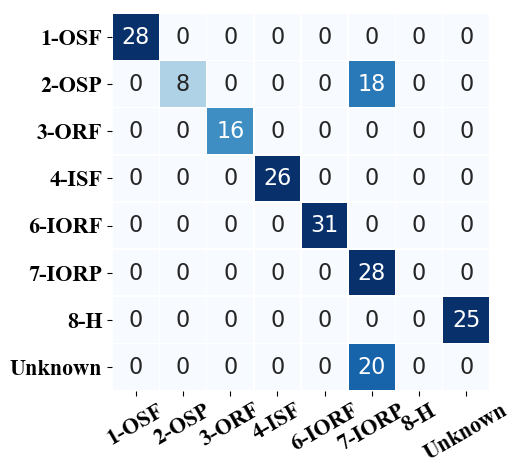

In [6]:
net_path = './models/Compared_Methods_STA_net.pkl'
net.load_state_dict(torch.load(net_path))

True_label = []
Pred_Label = []
for (i, (im, label)) in enumerate(tgt_test_loader):

    ss, _,  predict_prob =net.forward(im.cuda())
    
    label = np.argmax(label, axis=-1).reshape(-1, 1)
    predict_index = np.argmax(predict_prob.cpu().detach().numpy(), axis=-1).reshape(-1, 1)
    
    True_label.append(np.array(label.flatten()))
    Pred_Label.append(np.array(predict_index.flatten()))

y_true = np.array(True_label).reshape((200,))
y_pred = np.array(Pred_Label).reshape((200,))

m = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(5,5),dpi=100)
ax= sns.heatmap(m,vmin=0, vmax=25,cmap='Blues',annot=True,fmt='',linewidths=.5,square=True,cbar=None,annot_kws={"size":16})
plt.xticks(fontsize= 16, fontfamily= "Times New Roman")                      
plt.yticks(fontsize= 16, fontfamily= "Times New Roman") 
plt.margins(0, 0)
ax.set_xticklabels(Label_Name,rotation=30)
ax.set_yticklabels(Label_Name,rotation=0)

plt.margins(0, 0)

## The accuracy

In [7]:
pred_y = []
true_y = []
NUM_CLASSES = Y_1.shape[1]
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(tgt_test_loader):
        data, target = data.cuda(), target.cuda(non_blocking=True)
        ss, _,  predict_prob = net(data)
        pred = predict_prob.max(1, keepdim=True)[1] 
        for i in range(len(pred)):
            pred_y.append(pred[i].item())
            true_y.append(torch.argmax(target[i]).item())
a,b = utils.cal_acc(true_y, pred_y, NUM_CLASSES)
print("The accuracy on all the known classes: "+str(a))
print("The accuracy on all the target classes: "+str(b))

The accuracy on all the known classes: 0.685
The accuracy on all the target classes: 0.7611111111111111
